File: <code>ppg_abp_datasets_peak_50_without_filter.npz</code>

In [1]:
# Required libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check time
from tqdm import tqdm
from time import sleep

# Datasets
import vitaldb
import preprocess as pre
import pyvital

# PyTorch
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
from torch.optim import Adam
import torch.utils.data
from torch.utils.data import DataLoader
import torchvision.datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils

In [2]:
PPG = 'SNUADC/PLETH'
ABP = 'SNUADC/ART'
SRATE = 100
MAX_CASE = 100
SEC = 25      # Row data
SEC_EXT = 20  # Extract only matching data

case_sample = 0
valid_mask = []
ppg_sets = []
abp_sets = []

for cid in tqdm(range(1, MAX_CASE+1)):
    vals = vitaldb.load_case(caseid=cid, tnames=[PPG, ABP], interval=1/SRATE)
    for i in range(0, len(vals), SEC*SRATE):
        segx = vals[i:i+ SEC*SRATE]
        ppg, abp = segx[:,0], segx[:,1]
        
        if len(segx) < SEC*SRATE: # 20초 이하의 데이터는 사용 x
            continue
        ###########################################
        # Check the validity of the segemnt
        # Valid condition
        # (1) 0 <= PPG <= 100
        # (2) 20 <= ABP <= 200
        # (3) mstd_val(abp) > 0
        # Else, remove
        ###########################################
        
                
        valid = True
        mstd_val, _ = pre.process_beat(abp)
        
        if np.isnan(ppg).any() or np.isnan(abp).any(): # delete non-value
            valid = False
        if (ppg < 0).any() or (ppg > 100).any():
            valid = False
        if (abp < 20).any() or (abp > 250).any():
            valid = False
        if np.array(mstd_val) <= 0:
            valid = False
        if (np.abs(np.diff(ppg)) > 15).any():
            valid = False
        if (np.abs(np.diff(abp)) > 15).any():
            valid = False        
                
        if valid:
            # Check ppg peak point
            ppg = pyvital.arr.exclude_undefined(ppg)
            ppg_peaks = pyvital.arr.detect_peaks(ppg, 100) 
            
            # Check abp peak point
            abp = pyvital.arr.exclude_undefined(abp)
            abp_peaks = pyvital.arr.detect_peaks(abp, 100)
            
            # Mapping the first peak of ppg and the second peak of ABP
            try:
                pid, aid = ppg_peaks[0][0], abp_peaks[0][1]
                new_ppg = ppg[pid:pid+SEC_EXT*SRATE]
                new_abp = abp[aid:aid+SEC_EXT*SRATE]
                
                if len(new_ppg) != SEC_EXT*SRATE or len(new_abp) != SEC_EXT*SRATE:
                    continue
                    
                ppg_sets.append(new_ppg)
                abp_sets.append(new_abp)                
                case_sample += 1
            except:
                continue            

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

HR estimation failed, assume 75


  1%|▊                                                                                 | 1/100 [00:08<14:06,  8.55s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  2%|█▋                                                                                | 2/100 [00:11<08:26,  5.17s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  3%|██▍                                                                               | 3/100 [00:14<06:45,  4.18s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  4%|███▎                                                                              | 4/100 [00:28<12:59,  8.12s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  5%|████                                                                              | 5/100 [00:32<10:42,  6.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  6%|████▉                                                                             | 6/100 [00:33<07:32,  4.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  7%|█████▋                                                                            | 7/100 [00:45<10:42,  6.91s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  8%|██████▌                                                                           | 8/100 [00:46<07:47,  5.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  9%|███████▍                                                                          | 9/100 [00:47<05:44,  3.78s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 10%|████████                                                                         | 10/100 [01:00<10:04,  6.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 11%|████████▉                                                                        | 11/100 [01:01<07:23,  4.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 12%|█████████▋                                                                       | 12/100 [01:10<09:16,  6.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 13%|██████████▌                                                                      | 13/100 [01:18<09:33,  6.59s/it]

HR estimation failed, assume 75


 14%|███████████▎                                                                     | 14/100 [01:20<07:43,  5.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 15%|████████████▏                                                                    | 15/100 [01:21<05:38,  3.99s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 16%|████████████▉                                                                    | 16/100 [01:30<07:39,  5.47s/it]

HR estimation failed, assume 75


 17%|█████████████▊                                                                   | 17/100 [01:41<10:02,  7.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 18%|██████████████▌                                                                  | 18/100 [01:42<07:20,  5.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 19%|███████████████▍                                                                 | 19/100 [02:01<12:28,  9.23s/it]

HR estimation failed, assume 75


 20%|████████████████▏                                                                | 20/100 [02:19<15:55, 11.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 21%|█████████████████                                                                | 21/100 [02:21<11:55,  9.06s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 22%|█████████████████▊                                                               | 22/100 [02:31<11:56,  9.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 23%|██████████████████▋                                                              | 23/100 [02:31<08:29,  6.62s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|███████████████████▍                                                             | 24/100 [02:36<07:41,  6.08s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 25%|████████████████████▎                                                            | 25/100 [02:46<09:06,  7.29s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 26%|█████████████████████                                                            | 26/100 [02:54<09:20,  7.57s/it]

HR estimation failed, assume 75


 27%|█████████████████████▊                                                           | 27/100 [03:07<11:08,  9.15s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 28%|██████████████████████▋                                                          | 28/100 [03:26<14:26, 12.03s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 29%|███████████████████████▍                                                         | 29/100 [03:40<15:00, 12.68s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 30%|████████████████████████▎                                                        | 30/100 [03:42<11:02,  9.47s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 31%|█████████████████████████                                                        | 31/100 [03:49<10:03,  8.75s/it]

HR estimation failed, assume 75


 32%|█████████████████████████▉                                                       | 32/100 [03:54<08:29,  7.49s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 33%|██████████████████████████▋                                                      | 33/100 [03:55<06:15,  5.60s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 34%|███████████████████████████▌                                                     | 34/100 [04:10<09:15,  8.42s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 35%|████████████████████████████▎                                                    | 35/100 [04:11<06:45,  6.24s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 36%|█████████████████████████████▏                                                   | 36/100 [04:12<04:58,  4.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 37%|█████████████████████████████▉                                                   | 37/100 [04:14<04:04,  3.88s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 38%|██████████████████████████████▊                                                  | 38/100 [04:23<05:23,  5.22s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 39%|███████████████████████████████▌                                                 | 39/100 [04:23<03:57,  3.90s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 40%|████████████████████████████████▍                                                | 40/100 [04:25<03:08,  3.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 41%|█████████████████████████████████▏                                               | 41/100 [04:27<02:52,  2.92s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 42%|██████████████████████████████████                                               | 42/100 [04:30<02:45,  2.86s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 43%|██████████████████████████████████▊                                              | 43/100 [04:40<04:40,  4.92s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 44%|███████████████████████████████████▋                                             | 44/100 [04:49<05:53,  6.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 45%|████████████████████████████████████▍                                            | 45/100 [04:50<04:23,  4.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 46%|█████████████████████████████████████▎                                           | 46/100 [04:58<04:57,  5.51s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 47%|██████████████████████████████████████                                           | 47/100 [04:59<03:48,  4.32s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 48%|██████████████████████████████████████▉                                          | 48/100 [05:01<03:13,  3.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 49%|███████████████████████████████████████▋                                         | 49/100 [05:11<04:36,  5.42s/it]

HR estimation failed, assume 75


 50%|████████████████████████████████████████▌                                        | 50/100 [05:21<05:36,  6.74s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 51%|█████████████████████████████████████████▎                                       | 51/100 [05:27<05:24,  6.63s/it]

HR estimation failed, assume 75


 52%|██████████████████████████████████████████                                       | 52/100 [05:36<05:54,  7.39s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 53%|██████████████████████████████████████████▉                                      | 53/100 [05:41<05:17,  6.75s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 54%|███████████████████████████████████████████▋                                     | 54/100 [05:44<04:15,  5.56s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 55%|████████████████████████████████████████████▌                                    | 55/100 [05:54<05:00,  6.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 57%|██████████████████████████████████████████████▏                                  | 57/100 [05:56<02:55,  4.09s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 58%|██████████████████████████████████████████████▉                                  | 58/100 [06:04<03:37,  5.18s/it]

HR estimation failed, assume 75


 59%|███████████████████████████████████████████████▊                                 | 59/100 [06:06<02:58,  4.35s/it]

HR estimation failed, assume 75


 60%|████████████████████████████████████████████████▌                                | 60/100 [06:16<03:49,  5.73s/it]

HR estimation failed, assume 75


 61%|█████████████████████████████████████████████████▍                               | 61/100 [06:22<03:51,  5.94s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 62%|██████████████████████████████████████████████████▏                              | 62/100 [06:24<03:00,  4.76s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 63%|███████████████████████████████████████████████████                              | 63/100 [06:25<02:17,  3.71s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 64%|███████████████████████████████████████████████████▊                             | 64/100 [06:33<03:03,  5.11s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 65%|████████████████████████████████████████████████████▋                            | 65/100 [06:42<03:29,  5.98s/it]

HR estimation failed, assume 75


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [06:48<03:29,  6.15s/it]

HR estimation failed, assume 75


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [06:56<03:41,  6.70s/it]

HR estimation failed, assume 75


 68%|███████████████████████████████████████████████████████                          | 68/100 [07:02<03:31,  6.60s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [07:07<03:10,  6.14s/it]

HR estimation failed, assume 75


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [07:16<03:22,  6.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [07:17<02:28,  5.12s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [07:19<01:53,  4.05s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [07:20<01:24,  3.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [07:33<02:38,  6.10s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [07:49<03:50,  9.22s/it]

HR estimation failed, assume 75


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [07:55<02:26,  6.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [07:56<01:50,  5.01s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [08:08<02:23,  6.82s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [08:09<01:42,  5.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [08:11<01:23,  4.38s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [08:12<01:00,  3.37s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [08:24<01:38,  5.81s/it]

HR estimation failed, assume 75


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [08:35<01:59,  7.47s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [08:36<01:22,  5.52s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [08:37<00:58,  4.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [08:44<01:06,  5.14s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [08:46<00:48,  4.04s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [09:00<01:15,  6.91s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [09:01<00:51,  5.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [09:18<01:20,  8.95s/it]

HR estimation failed, assume 75


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [09:22<00:58,  7.35s/it]

HR estimation failed, assume 75


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [09:25<00:41,  5.98s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [09:43<00:57,  9.58s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [09:44<00:34,  7.00s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [10:08<00:48, 12.02s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [10:19<00:35, 11.71s/it]

HR estimation failed, assume 75


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [10:24<00:19,  9.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [10:25<00:07,  7.19s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [10:26<00:00,  6.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


In [5]:
print(case_sample)
print(len(ppg_sets), np.max(ppg_sets), np.min(ppg_sets))
print(len(abp_sets), np.max(abp_sets), np.min(abp_sets))

21791
21791 96.8018 0.0309719
21791 213.368 21.8015


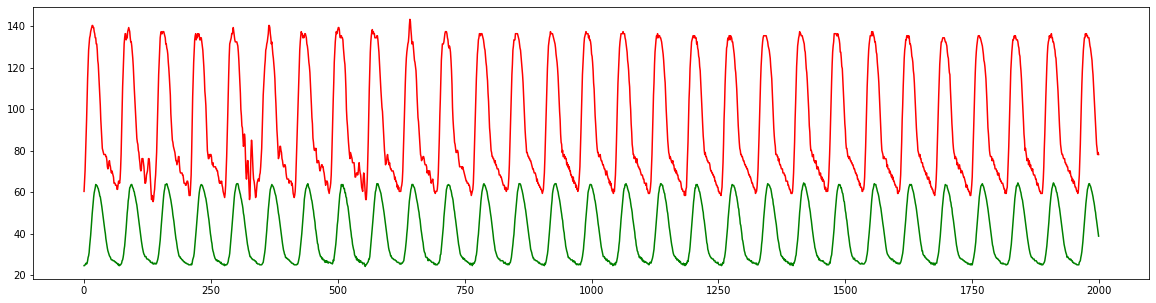

In [10]:
# Draw a sample waveform for PPG
plt.figure(figsize=(20,5))
plt.plot(ppg_sets[0], color='g')
plt.plot(abp_sets[0], color='r')
plt.show()

In [11]:
cachefile ='./../datasets/ppg_abp_datasets_peak_50_without_filter.npz'
np.savez(cachefile, ppg_sets=ppg_sets, abp_sets=abp_sets) # Save cahce file